*Notebook created by Enric Millán Iglesias for the Bachelor's Thesis (TFG) at BSC (2025).*

**Note:** Upload the ```parameter_tuning_RNN.csv``` file before running

# Hyperparameter Tuning for Vanilla RNN

Tuning was performed on region 11 using the years 2014, 2013, 2012, 2011 for training, 2010 for validation, and 2009 for testing. The year 2009 is used here to evaluate performance metrics for hyperparameter tuning.

## Loading experiment logs

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('parameter_tuning_RNN.csv')

# Display the shape and first few rows
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Loaded 108 rows and 57 columns


,timestamp,model_name,model_path,region,start_year,end_year,train_years,test_years,model_type,cell_type,...,mae_clipped,r2_clipped,mse_corrected,rmse_corrected,mae_corrected,r2_corrected,bias_correction,train_losses,val_losses,training_curve_path
0,20250505_192304,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.17831,0.98020,0.10171,0.31892,0.18284,0.98121,0.07603,"2.95235,0.15532,0.12120,0.10972,0.10386,0.1009...","0.23289,0.13707,0.11953,0.11118,0.10488,0.1014...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
1,20250505_192304,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.17147,0.98200,0.09698,0.31141,0.17667,0.98211,0.02862,"2.56994,0.13572,0.11904,0.10845,0.10117,0.0965...","0.17154,0.12698,0.11261,0.10554,0.09931,0.0973...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
2,20250505_192518,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.17311,0.98090,0.10112,0.31800,0.18043,0.98128,0.04704,"2.96139,0.12976,0.11132,0.10450,0.10082,0.0977...","0.15844,0.12160,0.11087,0.10297,0.10011,0.0980...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
3,20250505_192725,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.16789,0.98233,0.09468,0.30770,0.17293,0.98258,0.03860,"1.13733,0.10451,0.09776,0.09414,0.09199,0.0907...","0.11542,0.10574,0.10156,0.09765,0.09650,0.0960...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
4,20250505_192931,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.16950,0.98224,0.09583,0.30956,0.17459,0.98241,0.03307,"0.97443,0.10597,0.09844,0.09445,0.09183,0.0901...","0.12026,0.09986,0.09869,0.09505,0.09313,0.0921...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...


## Average performance by metrics and hyperparameters

In [ ]:
# Filter relevant columns
relevant_columns = ['dropout', 'weight_decay', 'hidden_size', 'mae', 'rmse', 'mse', 'r2']
df_filtered = df[relevant_columns].copy()

# Group by configuration and compute mean metrics
df_grouped = df_filtered.groupby(['dropout', 'weight_decay', 'hidden_size']).mean().reset_index()


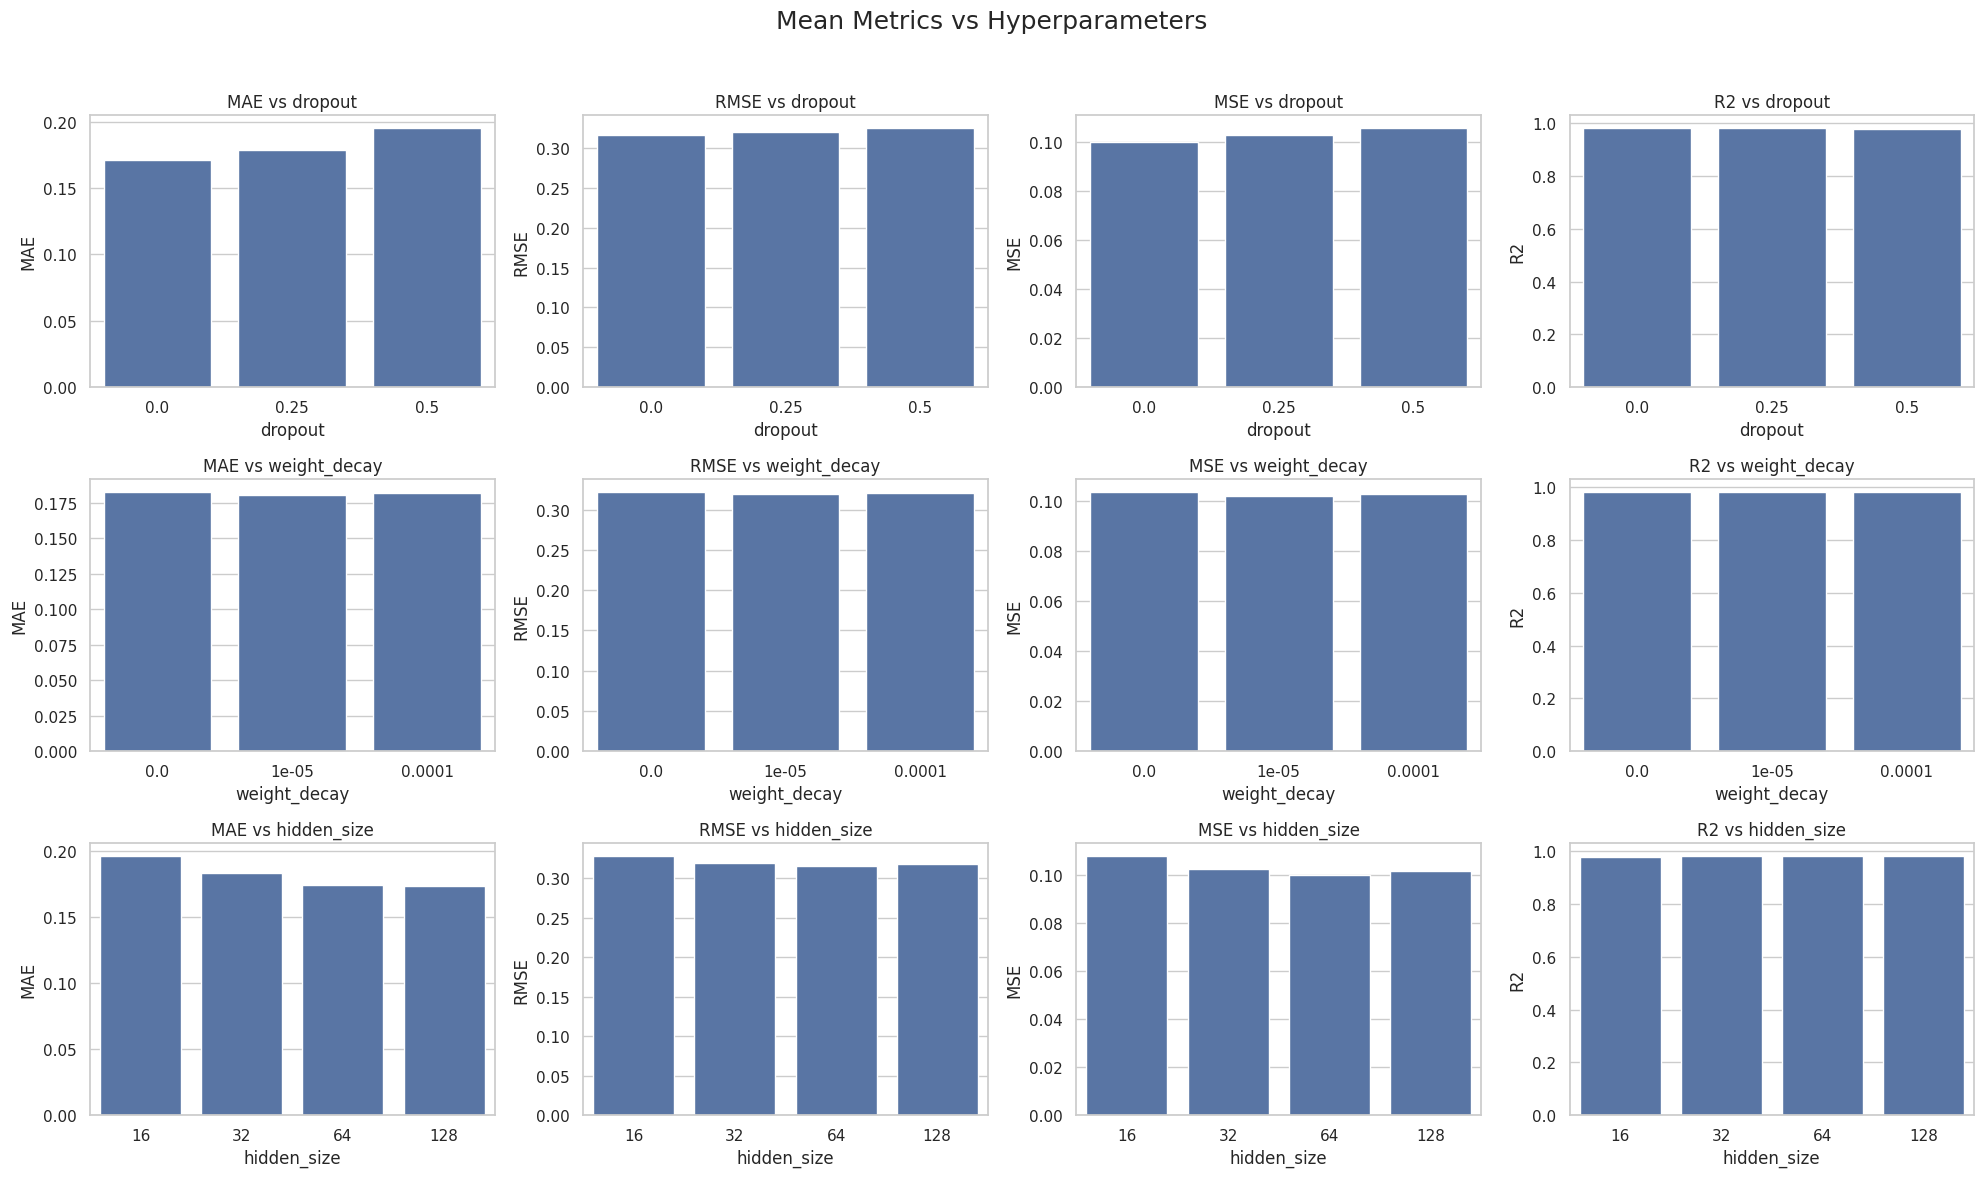

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Define metrics and hyperparameters
metrics = ['mae', 'rmse', 'mse', 'r2']
hyperparams = ['dropout', 'weight_decay', 'hidden_size']

# Create a 3x4 grid: rows = hyperparameters, columns = metrics
fig, axes = plt.subplots(len(hyperparams), len(metrics), figsize=(20, 12))

for i, param in enumerate(hyperparams):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        sns.barplot(data=df_grouped, x=param, y=metric, errorbar=None, ax=ax)
        ax.set_title(f'{metric.upper()} vs {param}')
        ax.set_xlabel(param)
        ax.set_ylabel(metric.upper())

plt.suptitle('Mean Metrics vs Hyperparameters', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

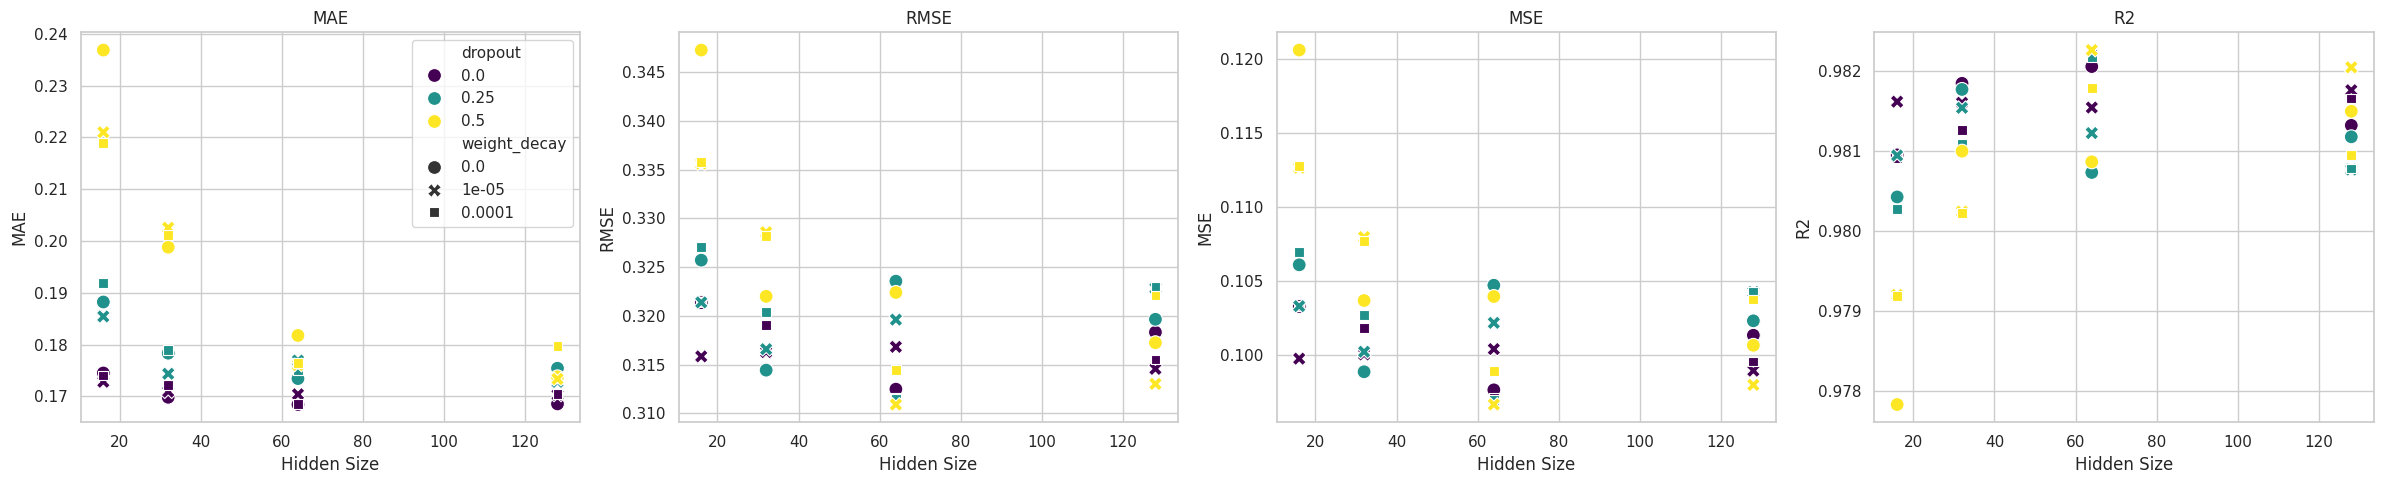

In [ ]:
sns.set(style="whitegrid")

# Create one row with four scatterplots (one per metric)
fig, axes = plt.subplots(1, len(metrics), figsize=(24, 5))

for i, metric in enumerate(metrics):
    ax = axes[i]
    scatter = sns.scatterplot(
        data=df_grouped,
        x='hidden_size',
        y=metric,
        hue='dropout',
        style='weight_decay',
        palette='viridis',
        s=100,
        ax=ax,
        legend=(i == 0)  # Only show legend in the first subplot
    )
    ax.set_title(f'{metric.upper()}')
    ax.set_xlabel('Hidden Size')
    ax.set_ylabel(metric.upper())

plt.tight_layout()
plt.show()

## Best configurations (averaged)

In [ ]:
for metric in metrics:
    print(f"\nTop 3 Configurations by {metric.upper()}:")

    # Sort ascending for all except R² (which is better when higher)
    ascending = False if metric == 'r2' else True

    top_configs = df_grouped.sort_values(by=metric, ascending=ascending).head(3)
    display_columns = ['dropout', 'weight_decay', 'hidden_size', 'mae', 'rmse', 'mse', 'r2']
    display(top_configs[display_columns])


Top 3 Configurations by MAE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
2,0.0,0.0000,64,0.168410,0.312490,0.097660,0.982060
3,0.0,0.0000,128,0.168530,0.318327,0.101347,0.981323
10,0.0,0.0001,64,0.168543,0.311633,0.097123,0.982213



Top 3 Configurations by RMSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
30,0.50,0.00001,64,0.176043,0.310913,0.096670,0.982267
22,0.25,0.00010,64,0.175137,0.311443,0.097000,0.982177
10,0.00,0.00010,64,0.168543,0.311633,0.097123,0.982213



Top 3 Configurations by MSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
30,0.50,0.00001,64,0.176043,0.310913,0.096670,0.982267
22,0.25,0.00010,64,0.175137,0.311443,0.097000,0.982177
10,0.00,0.00010,64,0.168543,0.311633,0.097123,0.982213



Top 3 Configurations by R2:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
30,0.50,0.00001,64,0.176043,0.310913,0.096670,0.982267
10,0.00,0.00010,64,0.168543,0.311633,0.097123,0.982213
22,0.25,0.00010,64,0.175137,0.311443,0.097000,0.982177


- **MAE Best Configuration**:  
  `dropout = 0.0`, `weight_decay = 0.0`, `hidden_size = 64`  
  This configuration minimizes the average absolute error, favoring unbiased, consistent predictions. It reflects the benefit of no regularization when model capacity is sufficient.

- **RMSE & MSE Best Configuration**:  
  `dropout = 0.5`, `weight_decay = 1e-5`, `hidden_size = 64`  
  These metrics highlight configurations that penalize large deviations more severely. The increased dropout helps to regularize the model, possibly mitigating overfitting and improving stability under higher-error scenarios.

- **R² Best Configuration**:  
  Also `dropout = 0.5`, `weight_decay = 1e-5`, `hidden_size = 64`  
  This setup also achieves the highest explained variance. Its regularization components seem to help the model generalize better, slightly improving overall fit.

  Despite these differences, it's worth noting how close the top configurations are in performance. For instance, the RMSE for the best RMSE/MSE/R² configuration (0.3109) is only about 0.002 lower than that of the MAE-optimal configuration (0.3125), and their R² values are nearly identical—differing by less than 0.001. This suggests that while regularization through dropout and weight decay may offer marginal improvements in variance-sensitive metrics, the simpler, unregularized configuration still remains highly competitive.

In [ ]:
best_rows = []

for metric in metrics:
    ascending = False if metric == 'r2' else True
    top_config = df_grouped.sort_values(by=metric, ascending=ascending).head(1).copy()
    top_config['best_for'] = metric.upper()
    best_rows.append(top_config)

# Concatenate and remove duplicates
best_df = pd.concat(best_rows)

# Define column order
display_columns = ['best_for', 'dropout', 'weight_decay', 'hidden_size', 'mae', 'rmse', 'mse', 'r2']
display(best_df[display_columns])

,best_for,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
2,MAE,0.0,0.00000,64,0.168410,0.312490,0.09766,0.982060
30,RMSE,0.5,0.00001,64,0.176043,0.310913,0.09667,0.982267
30,MSE,0.5,0.00001,64,0.176043,0.310913,0.09667,0.982267
30,R2,0.5,0.00001,64,0.176043,0.310913,0.09667,0.982267
